In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [8]:
# Load the data. 
# Used zip file bcse csv file was too big to upload to github.
#df = pd.read_csv('../Resources/2017.csv')
df = pd.read_csv('../Resources/2018.csv')
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,...,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [10]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [11]:
df.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

In [12]:
#Deleting cancelled flights
df_new = df[df['CANCELLED']==0]
df['CANCELLED'].unique()
print(f'Total rows after temoving column "CANCELLED" = {len(df_new)}')

Total rows after temoving column "CANCELLED" = 7096862


In [13]:
#Dropping the columns which are not required
df = df.drop(["OP_CARRIER_FL_NUM","DEP_TIME","ARR_TIME","CANCELLED","CANCELLATION_CODE","DIVERTED","CARRIER_DELAY"
             ,"WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY","Unnamed: 27"], axis=1)
print(f'Total rows after dropping  = {len(df)}\n')
for col in df.columns:
    print(col)
df.head(3).append(df.tail(3))

Total rows after dropping  = 7213446

FL_DATE
OP_CARRIER
ORIGIN
DEST
CRS_DEP_TIME
DEP_DELAY
TAXI_OUT
WHEELS_OFF
WHEELS_ON
TAXI_IN
CRS_ARR_TIME
ARR_DELAY
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
AIR_TIME
DISTANCE


,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,EWR,DEN,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0
1,2018-01-01,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,-24.0,99.0,83.0,65.0,414.0
2,2018-01-01,United Airlines,SNA,DEN,1335,-5.0,15.0,1345.0,1631.0,5.0,1649,-13.0,134.0,126.0,106.0,846.0
7213443,2018-12-31,American Airlines,CLT,MEM,2015,-5.0,36.0,2046.0,2114.0,4.0,2107,11.0,112.0,128.0,88.0,511.0
7213444,2018-12-31,American Airlines,CLT,RDU,1300,23.0,11.0,1334.0,1400.0,4.0,1350,14.0,50.0,41.0,26.0,130.0
7213445,2018-12-31,American Airlines,RDU,CLT,1435,8.0,8.0,1451.0,1535.0,7.0,1546,-4.0,71.0,59.0,44.0,130.0


In [14]:
df.dtypes

FL_DATE                 object
OP_CARRIER              object
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_DELAY              float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
dtype: object

In [15]:
df = df.dropna()
print(f'Total rows after Dropping NaN = {len(df)}\n')
df.isna().sum()

Total rows after Dropping NaN = 7071817



FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

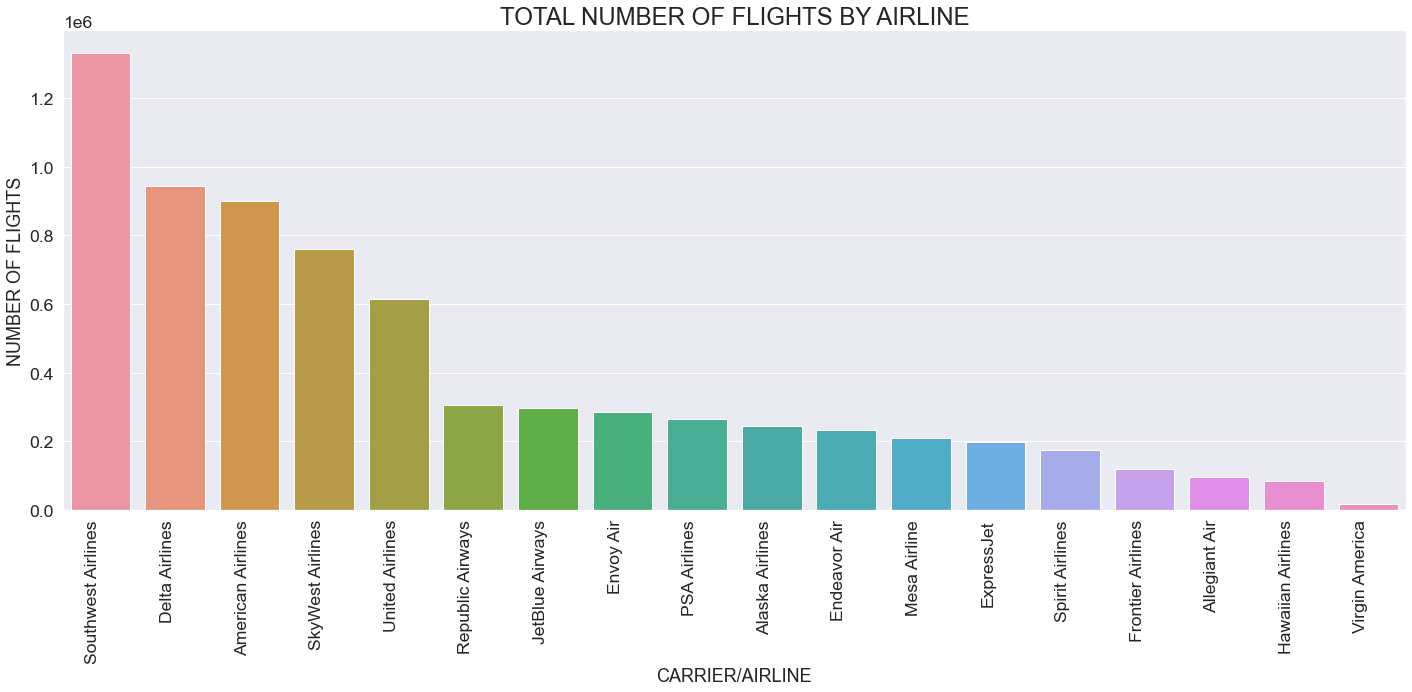

In [16]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['OP_CARRIER'], data=df, order=df['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [17]:
# Given we know by the Arr_Delay field if the flight was delayed we are going to add a field called Flight Status and make
# it binary where a "1" means the flight was delayed and a "0" means that it was not delayed

status = []

for value in df['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status
df.head(3).append(df.tail(3))    

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,United Airlines,EWR,DEN,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,-24.0,99.0,83.0,65.0,414.0,0
2,2018-01-01,United Airlines,SNA,DEN,1335,-5.0,15.0,1345.0,1631.0,5.0,1649,-13.0,134.0,126.0,106.0,846.0,0
7213443,2018-12-31,American Airlines,CLT,MEM,2015,-5.0,36.0,2046.0,2114.0,4.0,2107,11.0,112.0,128.0,88.0,511.0,1
7213444,2018-12-31,American Airlines,CLT,RDU,1300,23.0,11.0,1334.0,1400.0,4.0,1350,14.0,50.0,41.0,26.0,130.0,1
7213445,2018-12-31,American Airlines,RDU,CLT,1435,8.0,8.0,1451.0,1535.0,7.0,1546,-4.0,71.0,59.0,44.0,130.0,0


In [18]:
df.OP_CARRIER.value_counts()

Southwest Airlines    1331609
Delta Airlines         943837
American Airlines      899527
SkyWest Airlines       760796
United Airlines        614915
Republic Airways       305251
JetBlue Airways        297758
Envoy Air              284497
PSA Airlines           265784
Alaska Airlines        242979
Endeavor Air           231815
Mesa Airline           209094
ExpressJet             196583
Spirit Airlines        174129
Frontier Airlines      117523
Allegiant Air           95192
Hawaiian Airlines       83375
Virgin America          17153
Name: OP_CARRIER, dtype: int64

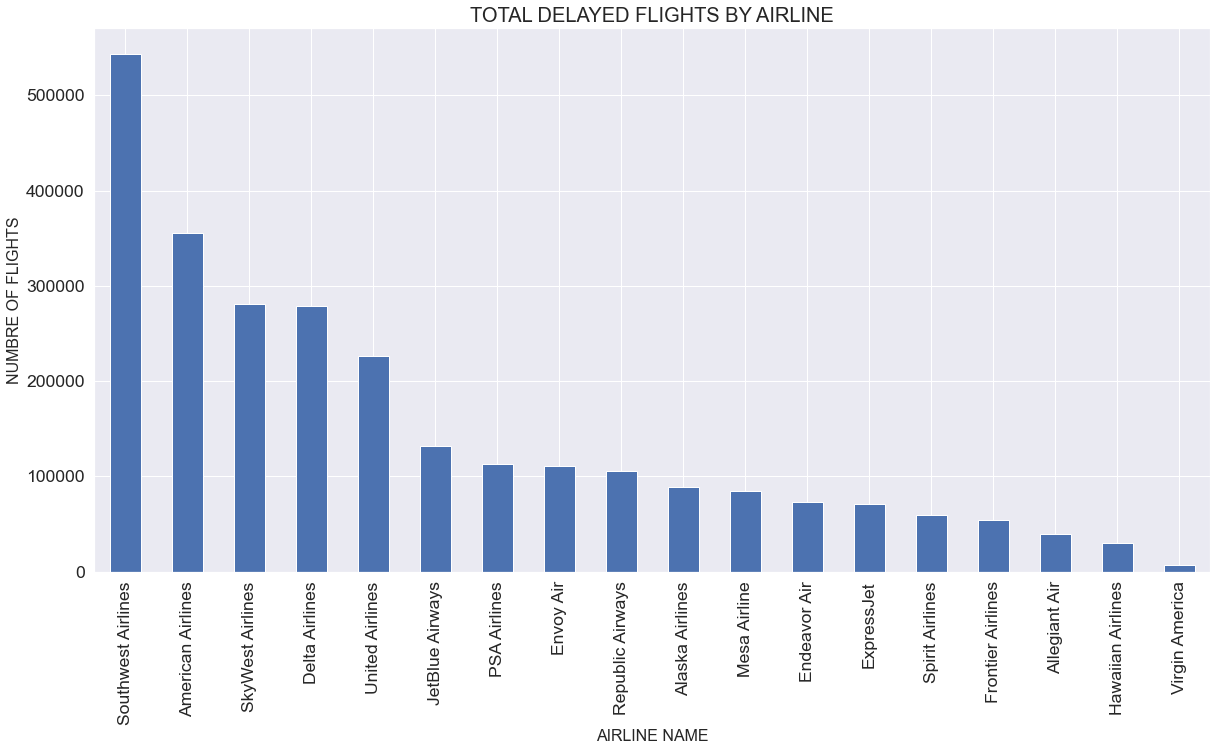

In [19]:
plt.figure(figsize=(20, 10))
df.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [20]:
# Creating Day and Month Columns so we can analyze if certain days or months have more flight delays

df['DAY'] = pd.DatetimeIndex(df['FL_DATE']).day
df['MONTH'] = pd.DatetimeIndex(df['FL_DATE']).month
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,2018-01-01,United Airlines,EWR,DEN,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0,0,1,1
1,2018-01-01,United Airlines,LAS,SFO,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,-24.0,99.0,83.0,65.0,414.0,0,1,1
2,2018-01-01,United Airlines,SNA,DEN,1335,-5.0,15.0,1345.0,1631.0,5.0,1649,-13.0,134.0,126.0,106.0,846.0,0,1,1
7213443,2018-12-31,American Airlines,CLT,MEM,2015,-5.0,36.0,2046.0,2114.0,4.0,2107,11.0,112.0,128.0,88.0,511.0,1,31,12
7213444,2018-12-31,American Airlines,CLT,RDU,1300,23.0,11.0,1334.0,1400.0,4.0,1350,14.0,50.0,41.0,26.0,130.0,1,31,12
7213445,2018-12-31,American Airlines,RDU,CLT,1435,8.0,8.0,1451.0,1535.0,7.0,1546,-4.0,71.0,59.0,44.0,130.0,0,31,12


In [21]:
# If we leave the military times for time based fields at the elemental levels they are, we create too many columns when we 
# hot encode, so we are separating the times in to 4 quadrants for the four time based fields below.  

df['CRS_DEP_TIME'] = np.ceil(df['CRS_DEP_TIME']/600).apply(int)
df['WHEELS_OFF'] = np.ceil(df['WHEELS_OFF']/600).apply(int) 
df['WHEELS_ON'] = np.ceil(df['WHEELS_ON']/600).apply(int)
df['CRS_ARR_TIME'] = np.ceil(df['CRS_ARR_TIME']/600).apply(int)
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,2018-01-01,United Airlines,EWR,DEN,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0,1,1
1,2018-01-01,United Airlines,LAS,SFO,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0,1,1
2,2018-01-01,United Airlines,SNA,DEN,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0,1,1
7213443,2018-12-31,American Airlines,CLT,MEM,4,-5.0,36.0,4,4,4.0,4,11.0,112.0,128.0,88.0,511.0,1,31,12
7213444,2018-12-31,American Airlines,CLT,RDU,3,23.0,11.0,3,3,4.0,3,14.0,50.0,41.0,26.0,130.0,1,31,12
7213445,2018-12-31,American Airlines,RDU,CLT,3,8.0,8.0,3,3,7.0,3,-4.0,71.0,59.0,44.0,130.0,0,31,12


In [22]:
import calendar
df['MONTH_NAME'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
df.head(3).append(df.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH,MONTH_NAME
0,2018-01-01,United Airlines,EWR,DEN,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0,1,1,Jan
1,2018-01-01,United Airlines,LAS,SFO,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0,1,1,Jan
2,2018-01-01,United Airlines,SNA,DEN,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0,1,1,Jan
7213443,2018-12-31,American Airlines,CLT,MEM,4,-5.0,36.0,4,4,4.0,4,11.0,112.0,128.0,88.0,511.0,1,31,12,Dec
7213444,2018-12-31,American Airlines,CLT,RDU,3,23.0,11.0,3,3,4.0,3,14.0,50.0,41.0,26.0,130.0,1,31,12,Dec
7213445,2018-12-31,American Airlines,RDU,CLT,3,8.0,8.0,3,3,7.0,3,-4.0,71.0,59.0,44.0,130.0,0,31,12,Dec


In [30]:
df1 = df
df1 = df1.drop(["FL_DATE","TAXI_OUT","WHEELS_OFF","WHEELS_ON","TAXI_IN","ARR_DELAY","MONTH_NAME"], axis=1)

In [32]:
for col in df1.columns:
    print(col)
df1

OP_CARRIER
ORIGIN
DEST
CRS_DEP_TIME
DEP_DELAY
CRS_ARR_TIME
CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME
AIR_TIME
DISTANCE
FLIGHT_STATUS
DAY
MONTH


,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
0,United Airlines,EWR,DEN,3,-5.0,3,268.0,250.0,225.0,1605.0,0,1,1
1,United Airlines,LAS,SFO,2,-8.0,3,99.0,83.0,65.0,414.0,0,1,1
2,United Airlines,SNA,DEN,3,-5.0,3,134.0,126.0,106.0,846.0,0,1,1
3,United Airlines,RSW,ORD,3,6.0,3,190.0,182.0,157.0,1120.0,0,1,1
4,United Airlines,ORD,ALB,2,20.0,2,112.0,106.0,83.0,723.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,American Airlines,DCA,CLT,3,-4.0,3,100.0,99.0,72.0,331.0,0,31,12
7213442,American Airlines,CLT,DFW,3,6.0,4,181.0,176.0,148.0,936.0,1,31,12
7213443,American Airlines,CLT,MEM,4,-5.0,4,112.0,128.0,88.0,511.0,1,31,12
7213444,American Airlines,CLT,RDU,3,23.0,3,50.0,41.0,26.0,130.0,1,31,12


In [39]:
df_delay = df1.query("FLIGHT_STATUS == 1").sample(n=20)
df_delay

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
3434731,Mesa Airline,MAF,DFW,2,89.0,2,80.0,70.0,48.0,309.0,1,25,6
6788338,Republic Airways,LGA,ATL,3,24.0,4,166.0,172.0,110.0,762.0,1,10,12
6925302,Delta Airlines,ORD,ATL,4,7.0,4,123.0,116.0,84.0,606.0,1,17,12
1774572,Southwest Airlines,ORF,BWI,2,8.0,2,60.0,56.0,42.0,159.0,1,4,4
1311246,SkyWest Airlines,CMH,DTW,4,-11.0,4,63.0,84.0,36.0,155.0,1,12,3
4815199,United Airlines,LAX,DEN,3,-6.0,4,143.0,175.0,117.0,862.0,1,31,8
4918424,Envoy Air,ORD,CVG,4,-2.0,1,64.0,78.0,44.0,264.0,1,5,9
2146208,PSA Airlines,CLT,TLH,3,22.0,3,88.0,93.0,68.0,386.0,1,23,4
2586731,Southwest Airlines,DTW,STL,4,5.0,4,90.0,86.0,70.0,440.0,1,15,5
6457622,Southwest Airlines,MDW,LAS,2,45.0,2,245.0,237.0,220.0,1521.0,1,22,11


In [38]:
df_no_delay = df1.query("FLIGHT_STATUS == 0").sample(n=20)
df_no_delay

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
4349636,Southwest Airlines,FLL,PIT,3,-5.0,3,160.0,147.0,129.0,994.0,0,8,8
3203857,Delta Airlines,RSW,ATL,2,-6.0,2,102.0,96.0,74.0,515.0,0,14,6
4909855,Southwest Airlines,DEN,TPA,3,-3.0,4,205.0,200.0,185.0,1506.0,0,5,9
4889307,American Airlines,MIA,ORD,3,-2.0,3,201.0,174.0,150.0,1197.0,0,4,9
960133,PSA Airlines,CLT,STL,2,-7.0,2,125.0,117.0,94.0,575.0,0,22,2
6295529,Spirit Airlines,PHX,ORD,4,-1.0,4,199.0,197.0,180.0,1440.0,0,14,11
1208094,Spirit Airlines,BWI,ATL,4,-2.0,4,118.0,106.0,90.0,577.0,0,7,3
5655451,Delta Airlines,HSV,ATL,3,-5.0,3,55.0,51.0,31.0,151.0,0,12,10
424075,United Airlines,EWR,LAX,3,-4.0,3,378.0,352.0,325.0,2454.0,0,24,1
5882943,American Airlines,MIA,ORD,4,-3.0,4,196.0,191.0,172.0,1197.0,0,24,10


In [40]:
new_data_df = df_delay.append(df_no_delay)
new_data_df

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH
3434731,Mesa Airline,MAF,DFW,2,89.0,2,80.0,70.0,48.0,309.0,1,25,6
6788338,Republic Airways,LGA,ATL,3,24.0,4,166.0,172.0,110.0,762.0,1,10,12
6925302,Delta Airlines,ORD,ATL,4,7.0,4,123.0,116.0,84.0,606.0,1,17,12
1774572,Southwest Airlines,ORF,BWI,2,8.0,2,60.0,56.0,42.0,159.0,1,4,4
1311246,SkyWest Airlines,CMH,DTW,4,-11.0,4,63.0,84.0,36.0,155.0,1,12,3
4815199,United Airlines,LAX,DEN,3,-6.0,4,143.0,175.0,117.0,862.0,1,31,8
4918424,Envoy Air,ORD,CVG,4,-2.0,1,64.0,78.0,44.0,264.0,1,5,9
2146208,PSA Airlines,CLT,TLH,3,22.0,3,88.0,93.0,68.0,386.0,1,23,4
2586731,Southwest Airlines,DTW,STL,4,5.0,4,90.0,86.0,70.0,440.0,1,15,5
6457622,Southwest Airlines,MDW,LAS,2,45.0,2,245.0,237.0,220.0,1521.0,1,22,11


In [42]:
new_data_df.shape

(40, 13)

In [41]:
new_data_df.to_csv('../Resources/new_data_2018.csv',index = False)